In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [5]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# shape of the dataset
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
28 * 28

784

In [9]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
X_train.shape

(60000, 784)

In [11]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [12]:
# one-hot encoding using keras' numpy-related utilities
n_classes  = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [42]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8145 - loss: 0.6656 - val_accuracy: 0.9376 - val_loss: 0.2140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9476 - loss: 0.1901 - val_accuracy: 0.9582 - val_loss: 0.1468
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9597 - loss: 0.1403 - val_accuracy: 0.9630 - val_loss: 0.1239
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9700 - loss: 0.1074 - val_accuracy: 0.9698 - val_loss: 0.1046
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9747 - loss: 0.0872 - val_accuracy: 0.9721 - val_loss: 0.0952
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9798 - loss: 0.0716 - val_accuracy: 0.9721 - val_loss: 0.0919
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9824 - loss: 0.0626 - val_accuracy: 0.9730 - val_loss: 0.0907
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9847 - loss: 0.0542 - val_accuracy: 

In [15]:
import numpy as np

y_pred = model.predict(X_test)
y_predict_enc = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_predict_enc]

print(y_predict_enc[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
[7.3590718e-07 7.3336076e-10 3.3156088e-05 1.2725443e-03 4.2279727e-10
 1.7344941e-07 5.5538083e-12 9.9867815e-01 6.2011634e-07 1.4499596e-05]
7


<Axes: >

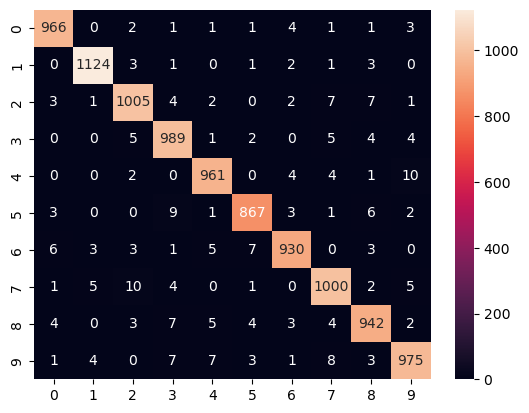

In [23]:
import seaborn as sns

# (X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1))
sns.heatmap(cm, annot=True, fmt='d')


In [24]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



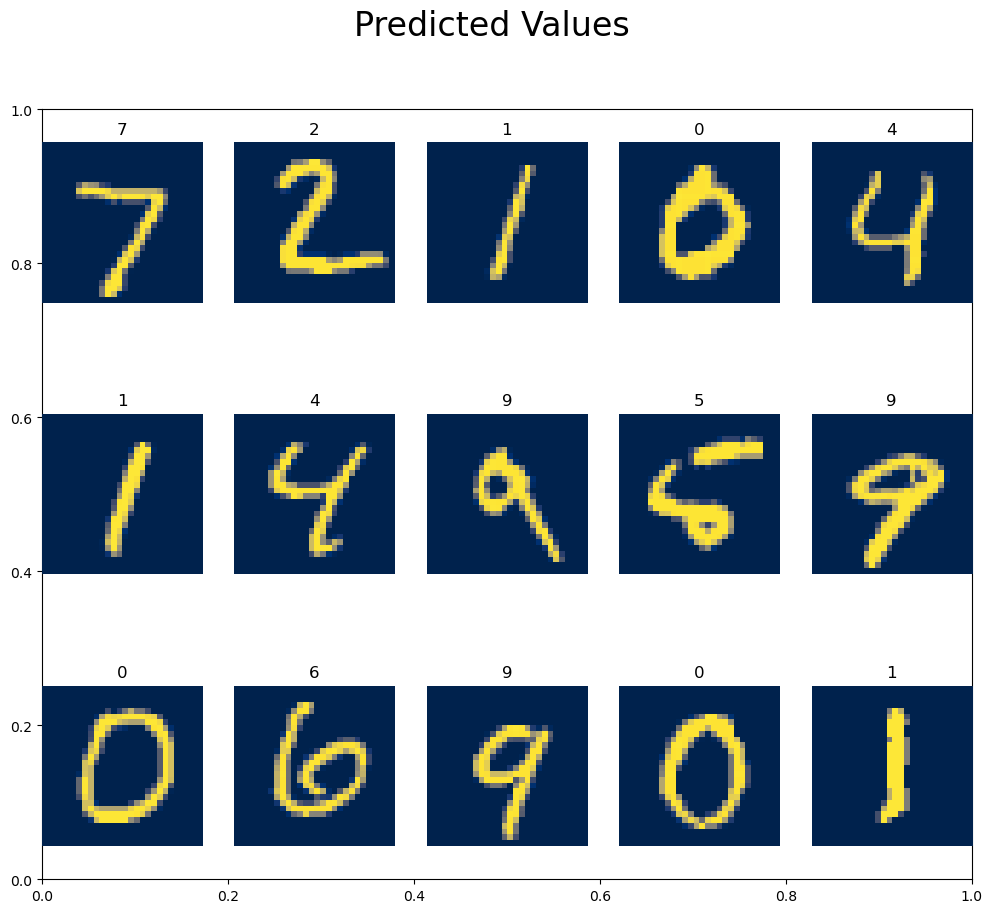

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
for ind, row in enumerate(X_test[:15]):
    plt.subplot(3, 5, ind + 1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted Values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

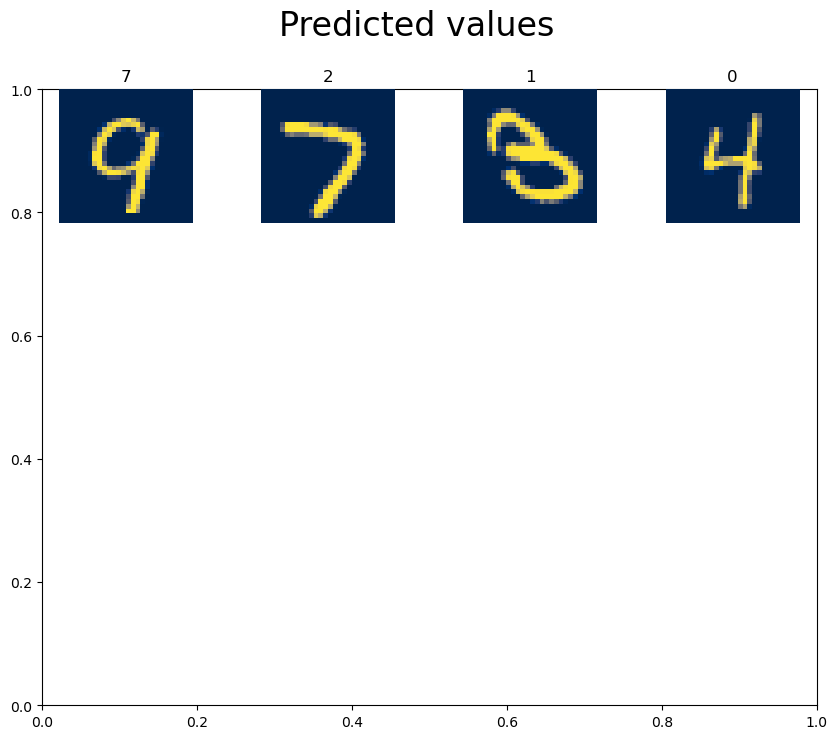

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
for ind, row in enumerate(X_test[16:20]):
    plt.subplot(4, 4, ind + 1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')